<a href="https://colab.research.google.com/github/samm40me/Samuel-OJagbohunmi/blob/master/04_Oct_tf_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [5]:
tf.keras.__version__

'2.4.0'

In [9]:
from tensorflow.keras.datasets import mnist

In [17]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
y_test.shape

(10000,)

In [22]:
import matplotlib.pyplot as plt


9


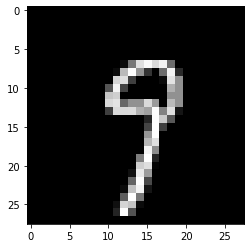

In [31]:
plt.imshow(x_train[1500], cmap='gray')
print(y_train[1500])

In [28]:
x_train[1500].shape

(28, 28)

In [29]:
print(x_train[1500])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 120 223 249 217 244
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 186 254 149  5

In [32]:
import numpy as np

In [36]:
alist = np.array([1,5,10,100,200,255])
alist

array([  1,   5,  10, 100, 200, 255])

In [35]:
alist/255

array([0.00392157, 0.01960784, 0.03921569, 0.39215686, 0.78431373,
       1.        ])

In [37]:
x_train = x_train/255

In [38]:
x_train[1500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
blist = np.array([0,1,2,1,1,2,0])

In [41]:
tf.keras.utils.to_categorical(blist)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [42]:
y_train = tf.keras.utils.to_categorical(y_train)

In [43]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [49]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer=SGD(),loss = categorical_crossentropy, metrics=["acc"])

In [53]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5901 - acc: 0.8581
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3135 - acc: 0.9137
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2658 - acc: 0.9266
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2357 - acc: 0.9345
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2130 - acc: 0.9409
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1947 - acc: 0.9466
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1793 - acc: 0.9507
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1663 - acc: 0.9538
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1552 - acc: 0.9571
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1453 - acc: 0.9606


In [55]:
??model.fit